In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [11]:
using Revise
includet("./base.jl")

using StatsBase
using UnPack
using DimensionalData

In [12]:
using GLMakie
using CairoMakie

In [18]:
f = jldopen("./v2main_highN0_base.jld2")
@unpack logKs, ls, T, final_states, final_T = f
leak_xs = LeakageScale.ltox.(ls);

fss = DimArray(final_states, (; logKs, ls))
fTs = DimArray(final_T, (; logKs, ls));

countmap(f["retcodes"])

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 2400

# New

In [22]:
fs_N = map(fss) do fs
    mean(fs[1,:])
end;
fs_N_ext = map(fss) do fs
    ex = extrema(fs[1,:])
    ex[2] - ex[1]
end;

In [107]:
LeakageScale.lxrange(0.01, 10; lmax=0.9999)

10-element Vector{Float64}:
 0.010000000000000009
 0.04473678027078676
 0.17839463757975293
 0.5016667160521355
 0.8235513205944236
 0.9558295975482406
 0.9901311456106908
 0.9978548161707309
 0.9995365328404067
 0.9999

In [100]:
LeakageScale.l.(leak_xs)

30-element Vector{Float64}:
 0.0
 0.034482758620689724
 0.06896551724137945
 0.10344827586206895
 0.13793103448275856
 0.17241379310344818
 0.206896551724138
 0.24137931034482762
 0.27586206896551724
 0.31034482758620685
 0.3448275862068966
 0.3793103448275862
 0.4137931034482758
 ⋮
 0.6206896551724138
 0.6551724137931034
 0.6896551724137931
 0.7241379310344828
 0.7586206896551724
 0.7931034482758621
 0.8275862068965517
 0.8620689655172413
 0.896551724137931
 0.9310344827586207
 0.9655172413793104
 1.0

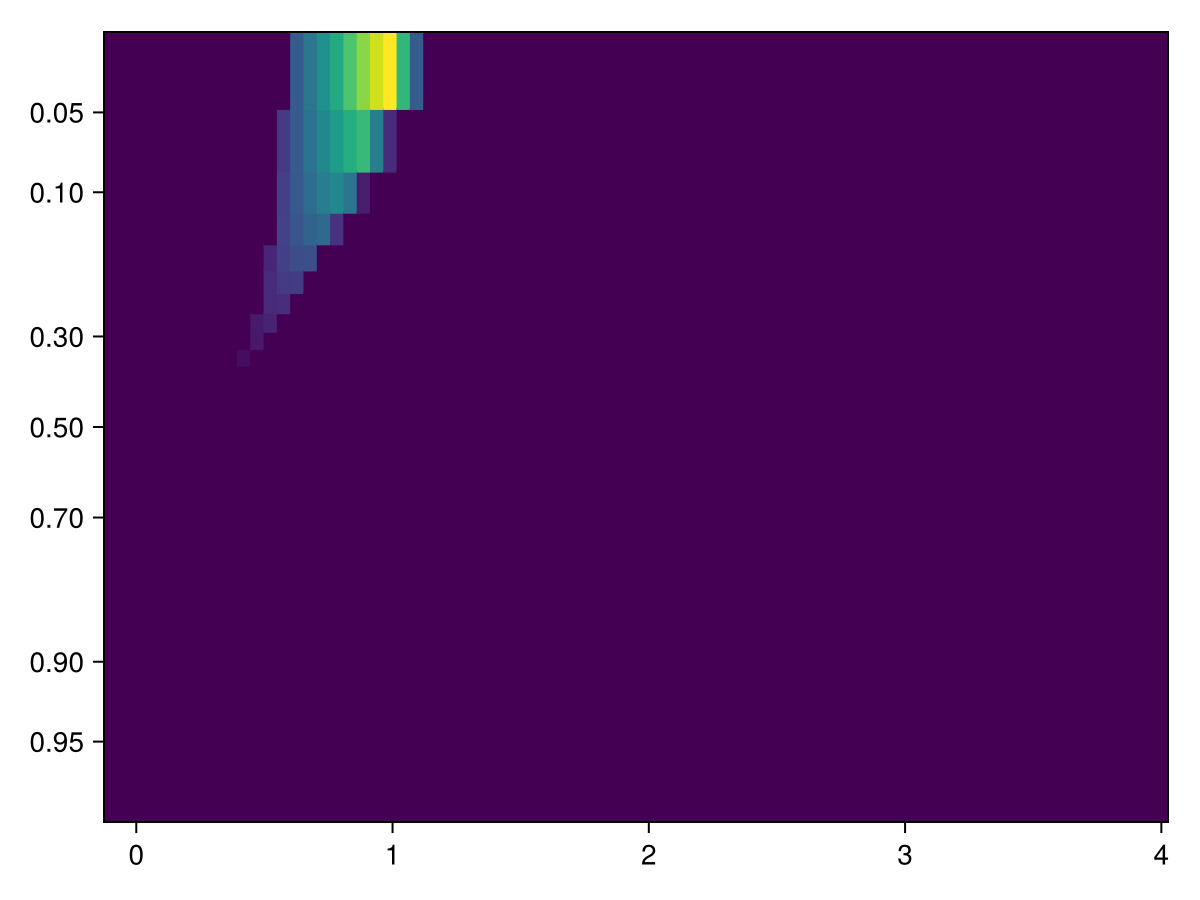

In [98]:
heatmap(logKs, leak_xs[2:end-1], Matrix(fs_N_ext[:,2:end-1]);
    axis=(;
        yticks=LeakageScale.exticks([0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99])
    )
)

In [27]:
fap = heatmap(logKs, ls, fs_N;
    # colorscale=log10
)
Colorbar(fap.figure[1,2], fap.plot)

fap

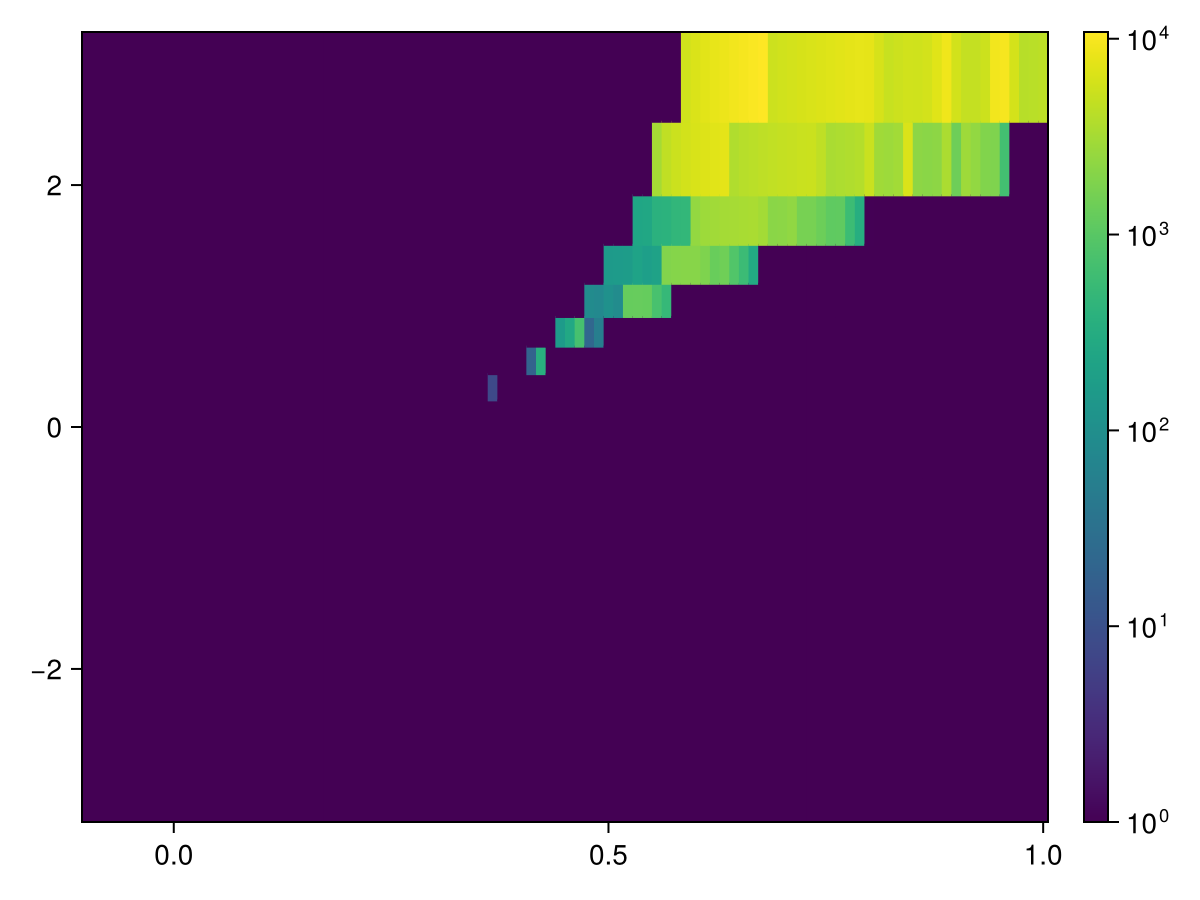

In [48]:
fap = heatmap(logKs, xs, fs_N_ext .+ 1;
    colorscale=log10
)
Colorbar(fap.figure[1,2], fap.plot)

fap

# First look and quality check

Dict{SciMLBase.ReturnCode.T, Int64} with 2 entries:
  Success => 1248
  MaxTime => 752

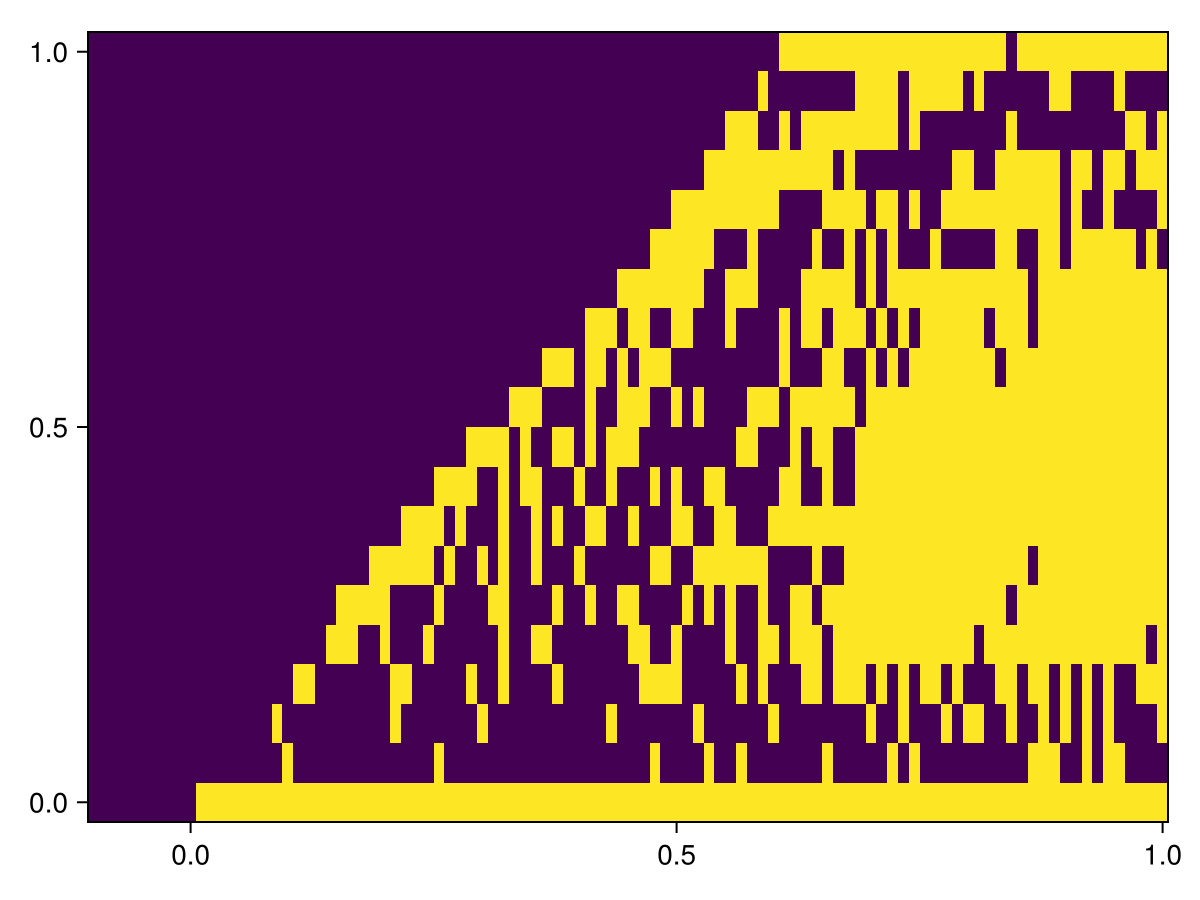

In [51]:
retcodes = f["retcodes"]
display(countmap(retcodes))
heatmap(f["logKs"], f["ls"], Int.(retcodes))

In [7]:
xx = findall(f["retcodes"][:,end-1]) do rc
    rc == ReturnCode.Success
end
show(xx)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 76, 82, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 97, 98, 99, 100]

In [8]:
xx = findall(f["retcodes"]) do rc
    rc == ReturnCode.Success
end;

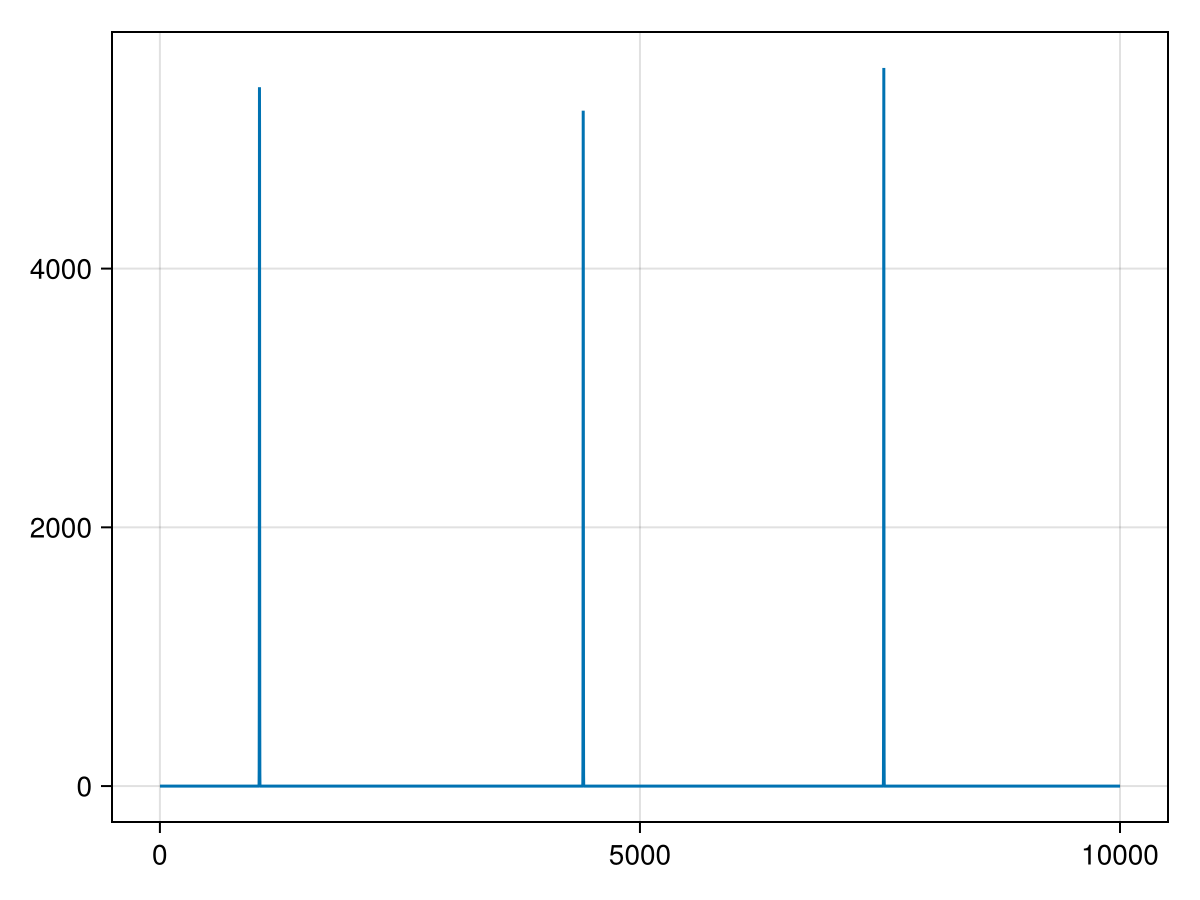

In [53]:
lines(sf[87,end-1][1,:])

# Lenghtscales

In [6]:
using DimensionalData
fss = DimArray(sf, (; logK=f["logKs"], ls=f["ls"]));

In [10]:
fss[Near(0.1),:]

┌ 20-element DimArray{Matrix{Float64}, 1} ┐
├─────────────────────────────────────────┴────────────────────────────── dims ┐
  ↓ ls Sampled{Float64} 0.0:0.05263157894736842:1.0 ForwardOrdered Regular Points
└──────────────────────────────────────────────────────────────────────────────┘
 0.0        …  [0.258926 0.258925 … 0.258926 0.258925; 1.0 1.0 … 1.0 1.0; -1.94752e-39 -1.94752e-39 … -1.94752e-39 -1.94752e-39]
 0.0526316     [0.203888 0.203888 … 0.203888 0.203888; 1.04572 1.04572 … 1.04572 1.04572; 0.00932106 0.00932106 … 0.00932106 0.00932106]
 0.105263      [0.142985 0.142985 … 0.142985 0.142985; 1.10144 1.10144 … 1.10144 1.10144; 0.0145039 0.0145039 … 0.0145039 0.0145039]
 0.157895      [0.0738112 0.0738112 … 0.0738112 0.0738112; 1.17239 1.17239 … 1.17239 1.17239; 0.0127243 0.0127243 … 0.0127243 0.0127243]
 0.210526      [-2.87647e-28 -5.85292e-28 … -2.88284e-28 -2.87015e-28; 1.25893 1.25893 … 1.25893 1.25893; -1.58345e-28 -1.58345e-28 … -1.58345e-28 -1.58345e-28]
 0.263158   …  

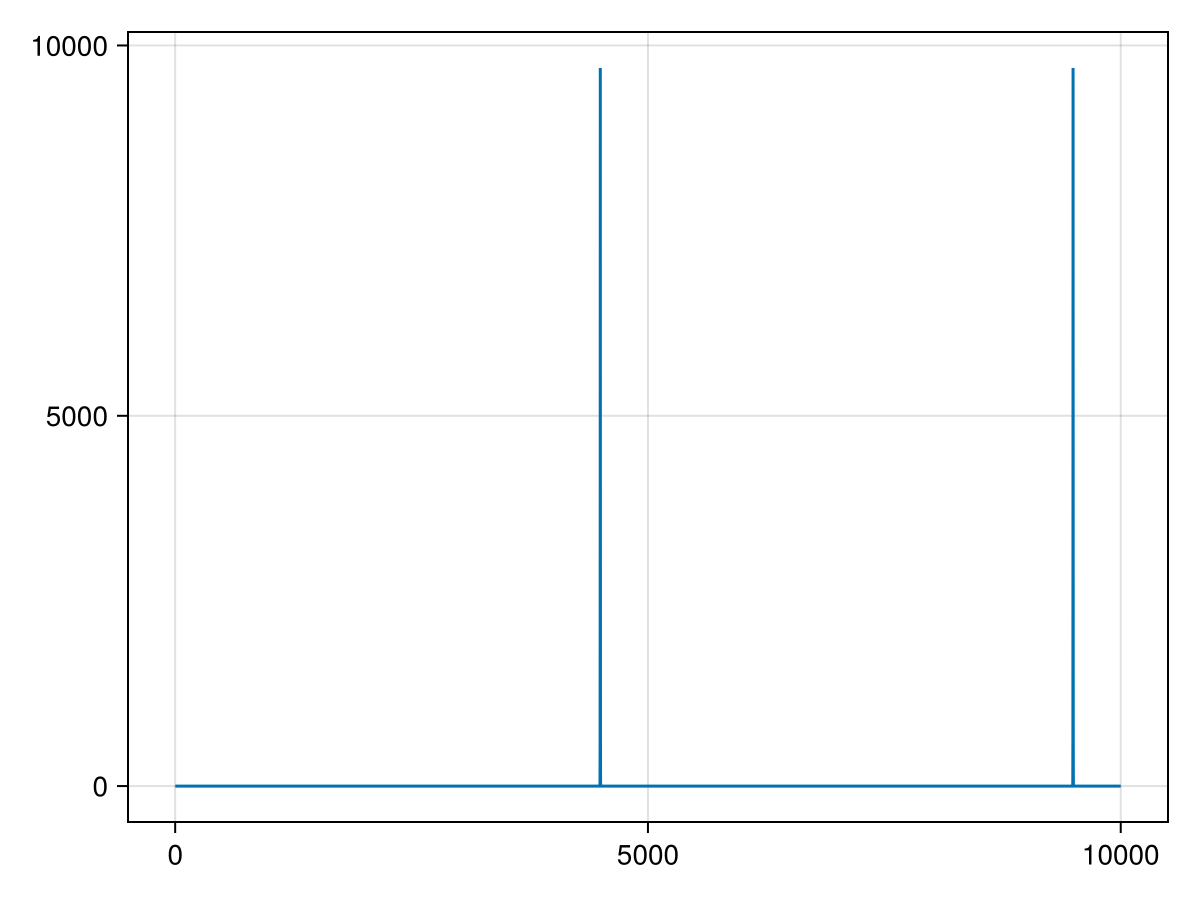

In [8]:
lines(fss[Near(0.8), Near(1.)][1,:])

## Running a system

In [31]:
L = 5 # system size in non-dim units
sN = 5000 # number of spatial points
epsilon = 1e-5 # initial condition noise amplitude

dx = L / (sN + 1)
u0 = clamp.(reduce(hcat, [[100.0, 0.0, 0.0] .+ epsilon .* randn(3) for _ in 1:sN]), 0.0, Inf)

mmp = MMParams(;
    K=10. ^ 1.3,
    m=1.0,
    l=1.,
    k=0.0,
    c=1.0,
    d=1.0,
)
sps = BSMMiCRMParams(
    mmp_to_mmicrm(mmp; static=false),
    [1e-6, 1.0, 1.0],
    make_cartesianspace_smart(1; dx),
    nthreads()
)
sp = make_smmicrm_problem(sps, copy(u0), 1e6)

tol = 10000 * eps()
@time s = solve(sp, QNDF();
    # dense=false,
    # save_everystep=false,
    abstol=tol,
    reltol=tol,
    callback=make_timer_callback(120)
);

 53.628256 seconds (6.60 M allocations: 14.183 GiB, 21.34% gc time)


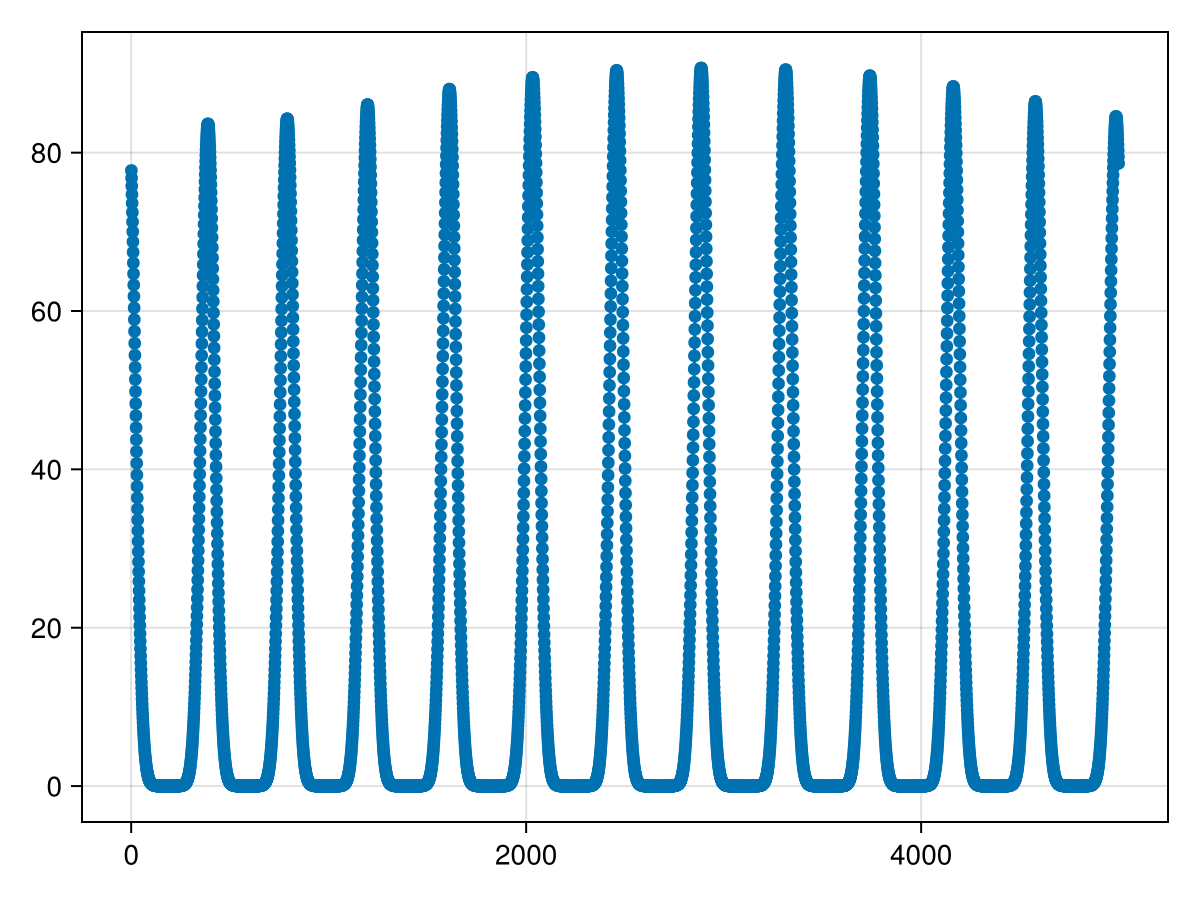

In [32]:
fap = scatterlines(s.u[end][1,:])
# display(GLMakie.Screen(), fap.figure)

In [24]:
f = plot_1dsmmicrm_sol_interactive(s)
display(GLMakie.Screen(), f)

GLMakie.Screen(...)

# Final state abundances

In [23]:
# final states averaged accros space
sfsums = map(sf) do su
    mean(su; dims=2)[:,1]
end;
sfstds = map(sf) do su
    std(su; dims=2)[:,1]
end;

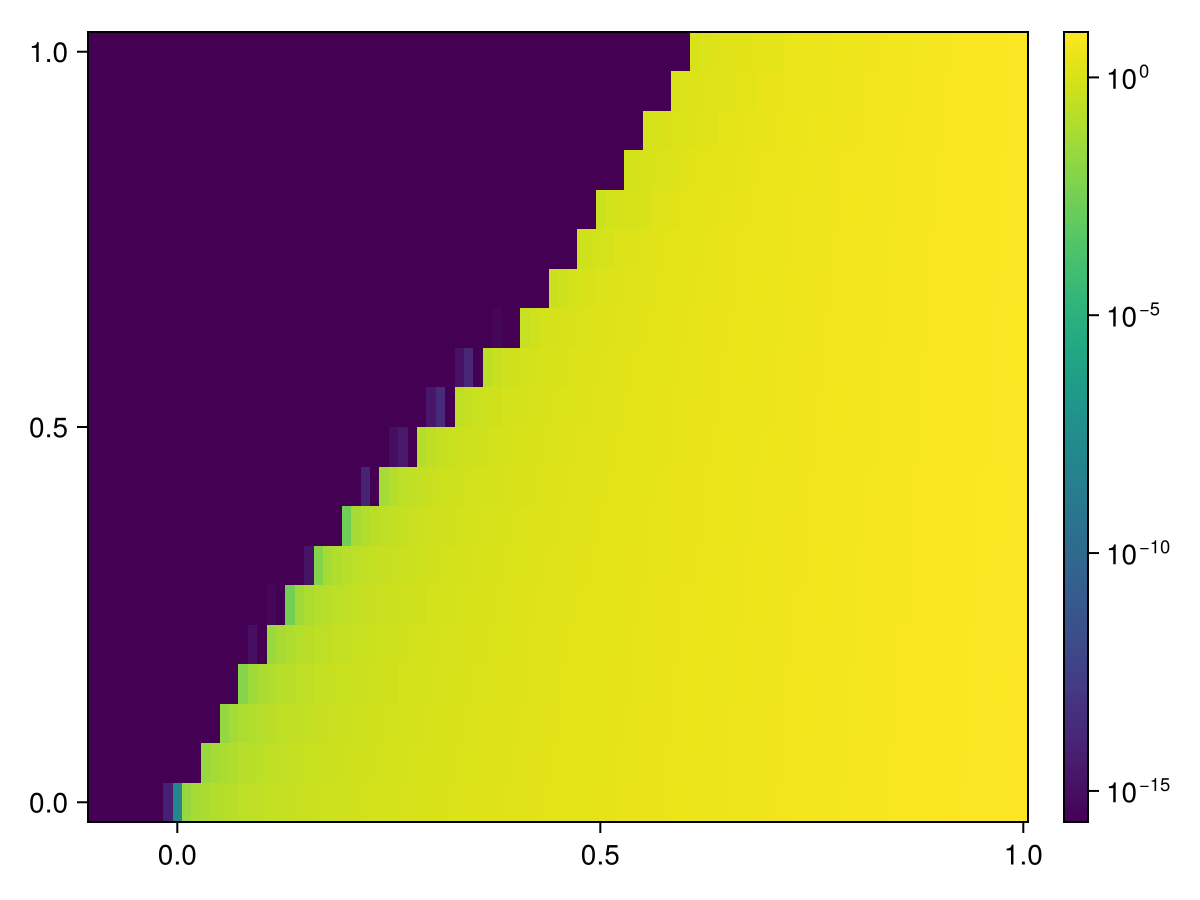

In [27]:
xx = getindex.(sfsums, 1)
yy = clamp.(xx, max(minimum(xx), eps()), Inf)
fap = heatmap(logKs, ls, yy;
    colorscale=log10
)
Colorbar(fap.figure[1,2], fap.plot)
fap

## Peaks in N

In [121]:
using Peaks

In [122]:
final_Ns = map(sf) do su
    su[1,:]
end;

In [123]:
xx = map(final_Ns) do n
    try
        xx = findpeaks(n, 50)
        
        peakwidths!(xx; min=4)
        peakproms!(xx; min=2)
        (xx.heights, xx.widths)
    catch e
        ([], [])
    end
end;
numpeaks = map(xx) do x
    length(x[1])
end;
avgheights = map(xx) do x
    isempty(x[1]) ? 0. : mean(x[1])
end;
avgwidths = map(xx) do x
    isempty(x[1]) ? 0. : mean(x[2])
end;
# xx

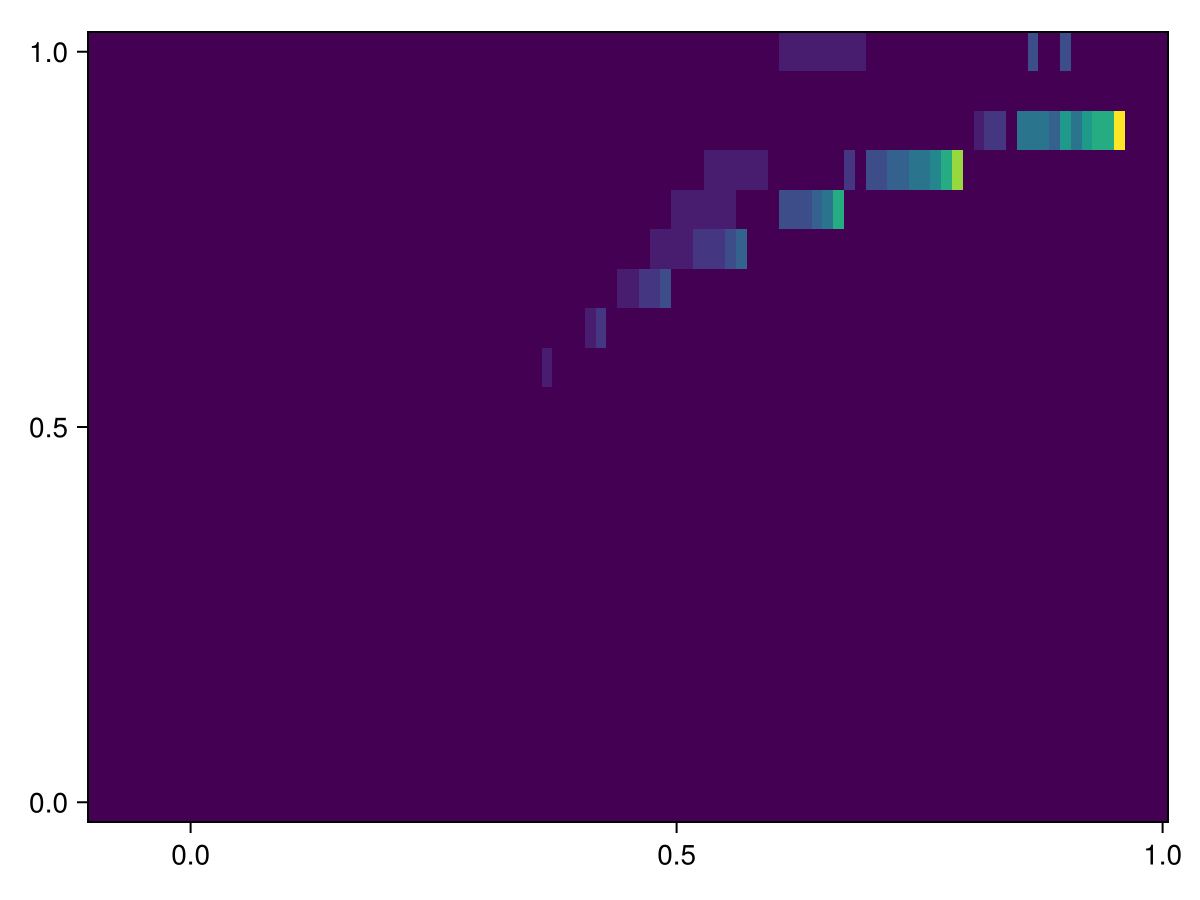

In [127]:
heatmap(logKs, ls, numpeaks)

#### Learning how to use Peaks

In [114]:
n = rand(final_Ns);
# fap = scatter(n)

In [116]:
xx.

10000-element Vector{Float64}:
 4.189440992717516
 4.189386208318009
 4.1894378422363525
 4.189380459771995
 4.189407350975934
 4.1893481336488
 4.1893353675112
 4.18934539073762
 4.189440841388544
 4.189440745951759
 4.189352454029981
 4.189348014301537
 4.189347754861053
 ⋮
 4.189409012444482
 4.189383308435647
 4.189335959945551
 4.189353726720511
 4.189358643156936
 4.189296290888811
 4.189335050073583
 4.189404961693147
 4.189361897192555
 4.189364531185453
 4.189312616106133
 4.189385506625279

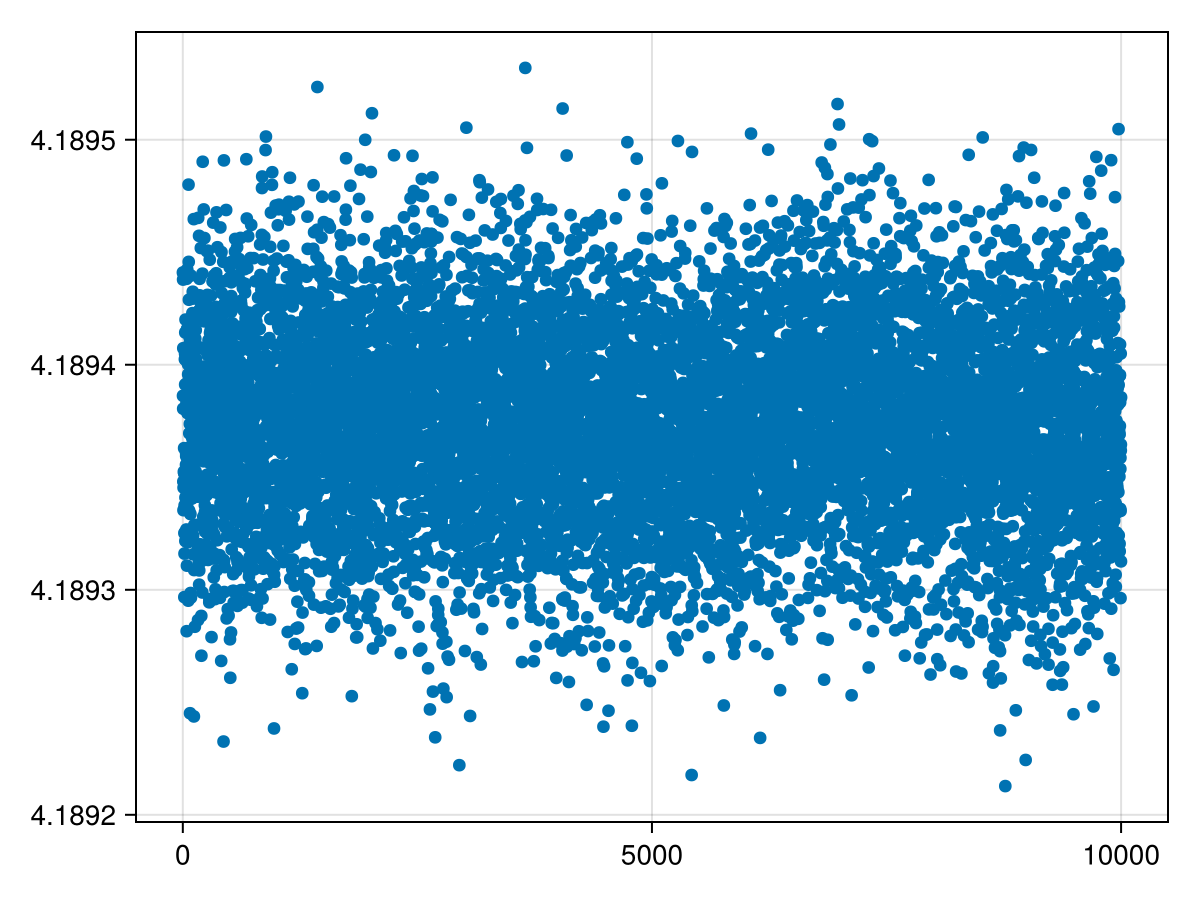

In [115]:
# xx = findpeaks(n, 50; widths=(; min=4), proms=(; min=2))
xx = findpeaks(n, 50)
peakwidths!(xx; min=4)
peakproms!(xx; min=2)
# xx = peakproms(peakwidths(xx; min=4); min=2)

fap = scatter(n)
scatter!(fap.axis, xx.indices, xx.heights)
fap

In [77]:
xx = findpeaks(n, 50; widths=(; min=5))

(indices = [257, 1346, 2416, 2971, 3509, 4653, 5269, 5808, 6498, 6938, 8031, 9143], heights = [1879.3398654884863, 1818.742080172004, 1809.0219112399848, 3.459119278675361e-269, 1913.6587158885952, 1978.926874996613, 4.050343627475708e-267, 1972.4283768321532, 4.582952174420758e-266, 1902.4430674426833, 1876.907458324364, 1904.0191899844933], data = [2.5130422180831975e-260, 1.6849869594456832e-258, -2.4149243535617825e-259, -1.1840633402552305e-258, 2.1156808380991638e-259, 3.0296093747643665e-258, -2.4777097976431064e-258, -7.184140324802482e-258, 1.7439686787385945e-257, -1.3499570346167022e-257  …  -1.2058770872231117e-258, 2.4758745490446477e-258, 5.659311565277212e-258, -2.6570875852646027e-258, -8.95914143893792e-258, -2.4725190615966635e-258, 6.197087030824797e-258, 3.7406297881603708e-258, -2.141815293815641e-258, -2.3136536862129557e-258], proms = [1879.3398654884863, 1818.742080172004, 1809.0219112399848, 2.0562604434230526e-267, 1913.6587158885952, 1978.926874996613, 8.8645

In [61]:
peakwidths(xx; min=5)

(indices = Int64[], heights = Float64[], data = [479.3930668583815, 479.39308319938607, 479.39308625510455, 479.393075452154, 479.39305496913516, 479.3930368670098, 479.39303809766875, 479.3930621369037, 479.393087594653, 479.3930886966716  …  479.3930624377531, 479.39305610052946, 479.39305878179323, 479.3930614570881, 479.3930621283268, 479.3930663215964, 479.3930720393448, 479.39306950880973, 479.39305708162703, 479.3930463314457], proms = Float64[], widths = Float64[], edges = Tuple{Float64, Float64}[])

In [57]:
xx.proms ./ xx.widths

6-element Vector{Float64}:
 2.4880694056602354e-5
 2.1975575994870742e-5
 2.8204388849199628e-5
 1.7976210076440248e-5
 2.1006278111015457e-5
 1.8807702563016446e-5

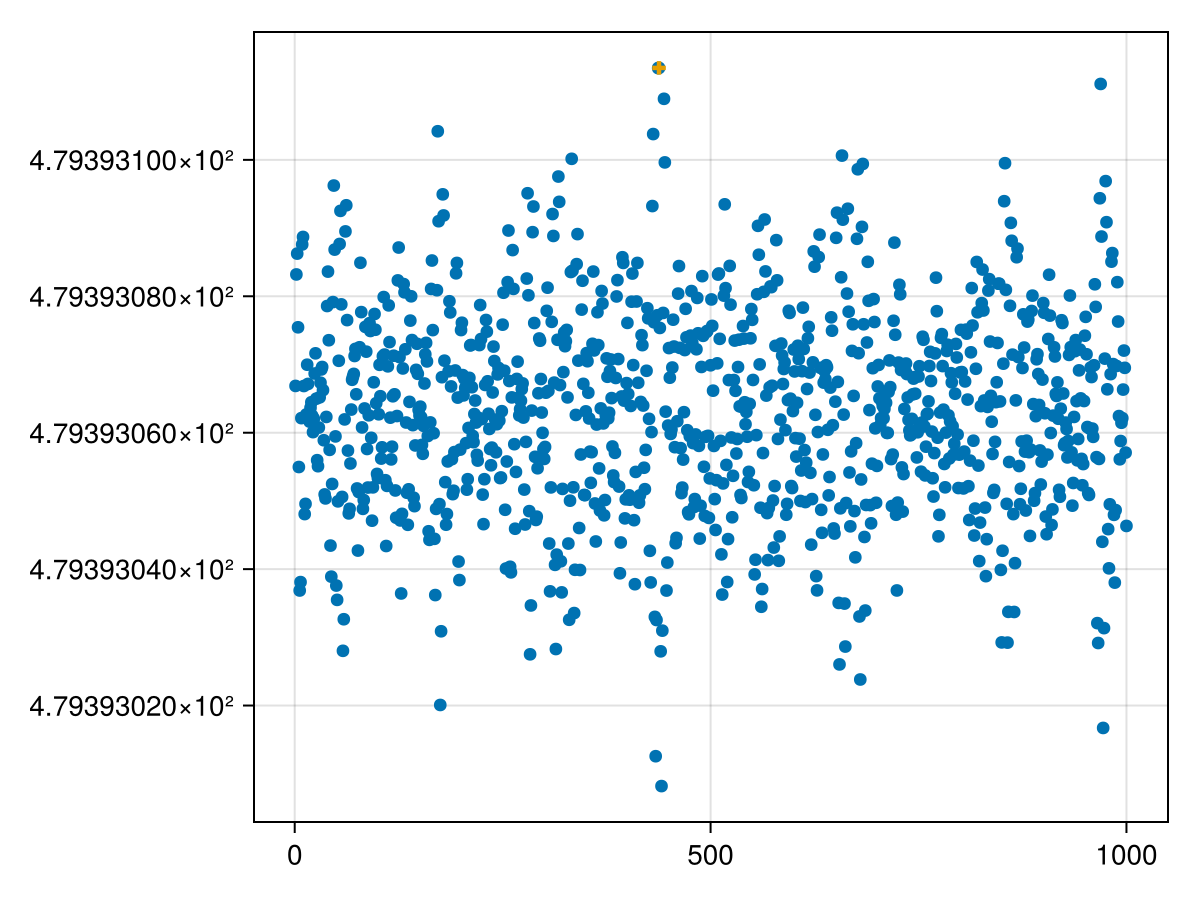

In [41]:
sn = n[1:1000]

xx = findpeaks(sn, 100; proms=(; min=1e-4))

fap = scatter(1:length(sn), sn)
scatter!(fap.axis, xx.indices, xx.heights; marker=:cross)

fap

In [32]:
xx

(indices = [172, 438, 658, 854], heights = [479.3931041919586, 479.39311347908205, 479.39310062266173, 479.3930995102553], data = [479.3930668583815, 479.39308319938607, 479.39308625510455, 479.393075452154, 479.39305496913516, 479.3930368670098, 479.39303809766875, 479.3930621369037, 479.393087594653, 479.3930886966716  …  479.3930624377531, 479.39305610052946, 479.39305878179323, 479.3930614570881, 479.3930621283268, 479.3930663215964, 479.3930720393448, 479.39306950880973, 479.39305708162703, 479.3930463314457], proms = [7.616871630489186e-5, 0.0001009059245689059, 7.459382118213398e-5, 7.034092868707376e-5], widths = [3.0613581812312702, 3.577667472549024, 3.551025116772962, 3.7400064389253203], edges = [(170.53891758881596, 173.60027577004723), (435.68240650405966, 439.2600739766087), (656.425502353975, 659.976527470748), (851.7892209765583, 855.5292274154837)])

## Comparing to no-space final abundances!

In [129]:
m3r = run_Kl_nospace(;
    logKs, ls
);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


In [130]:
ns = m3r.final_states
ws = sfsums
Nns = getindex.(ns, 1)
Nws = getindex.(ws, 1);

In [131]:
minval = max(min(minimum(Nws), minimum(Nns)), eps())
maxval = max(maximum(Nws), maximum(Nns))
cNws = clamp.(Nws, minval, Inf)
cNns = clamp.(Nns, minval, Inf);

#### Plotting side by side

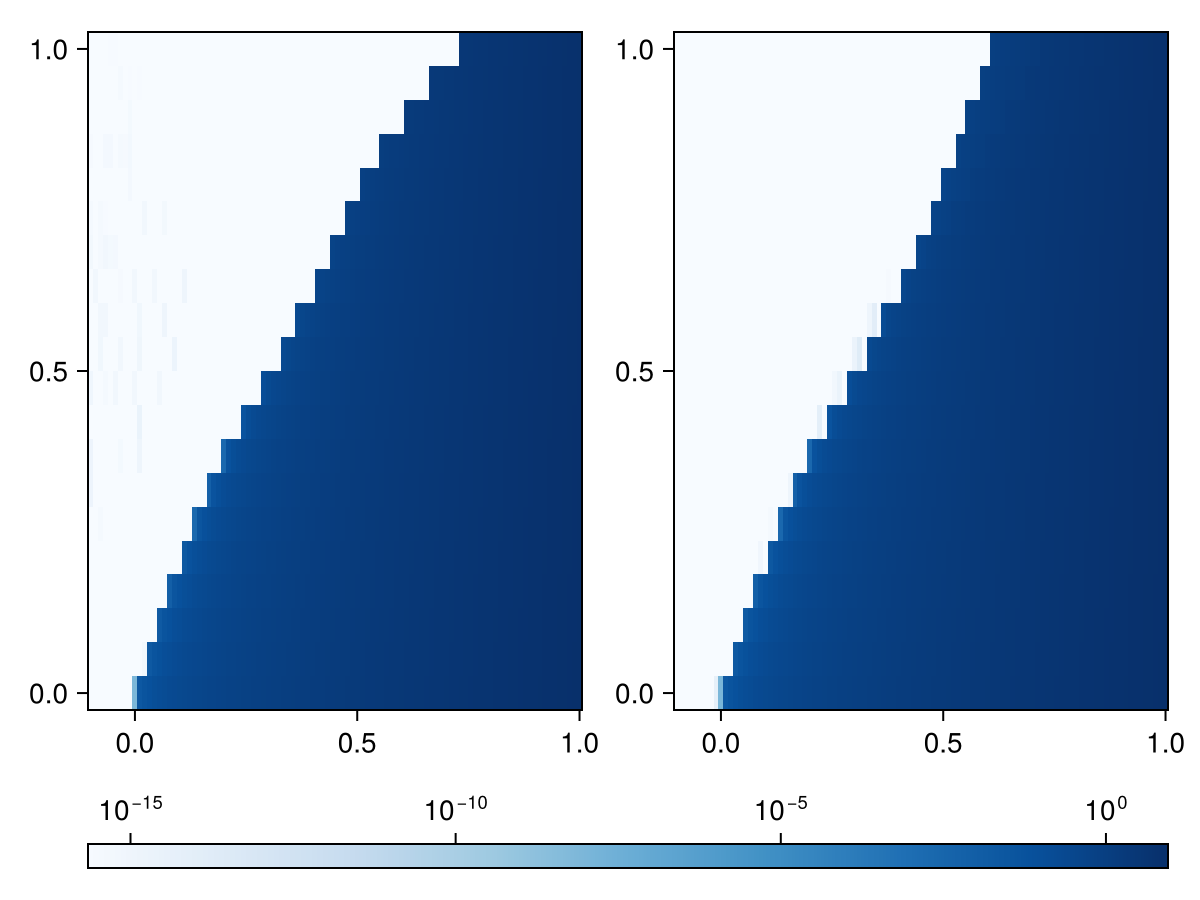

In [132]:
fig = Figure()
ax1 = Axis(fig[1,1])
ax2 = Axis(fig[1,2])

hm_kwargs = (;
    colormap=:Blues,
    colorrange=(minval, maxval),
    colorscale=log10
)

hm1 = heatmap!(ax1, logKs, ls, cNns; hm_kwargs...)
hm2 = heatmap!(ax2, logKs, ls, cNws; hm_kwargs...)

Colorbar(fig[2,:], hm1; vertical=false)


fig
# fap = heatmap(dN ./ (Nws .+ Nns);
# fap = heatmap(dN / (Nws .+ Nns);
    # colorscale=Makie.Symlog10(1000*eps())
    # colorscale=Makie.pseudolog10
# )
# Colorbar(fap.figure[1,2], fap.plot)
# fap

#### Correlation?

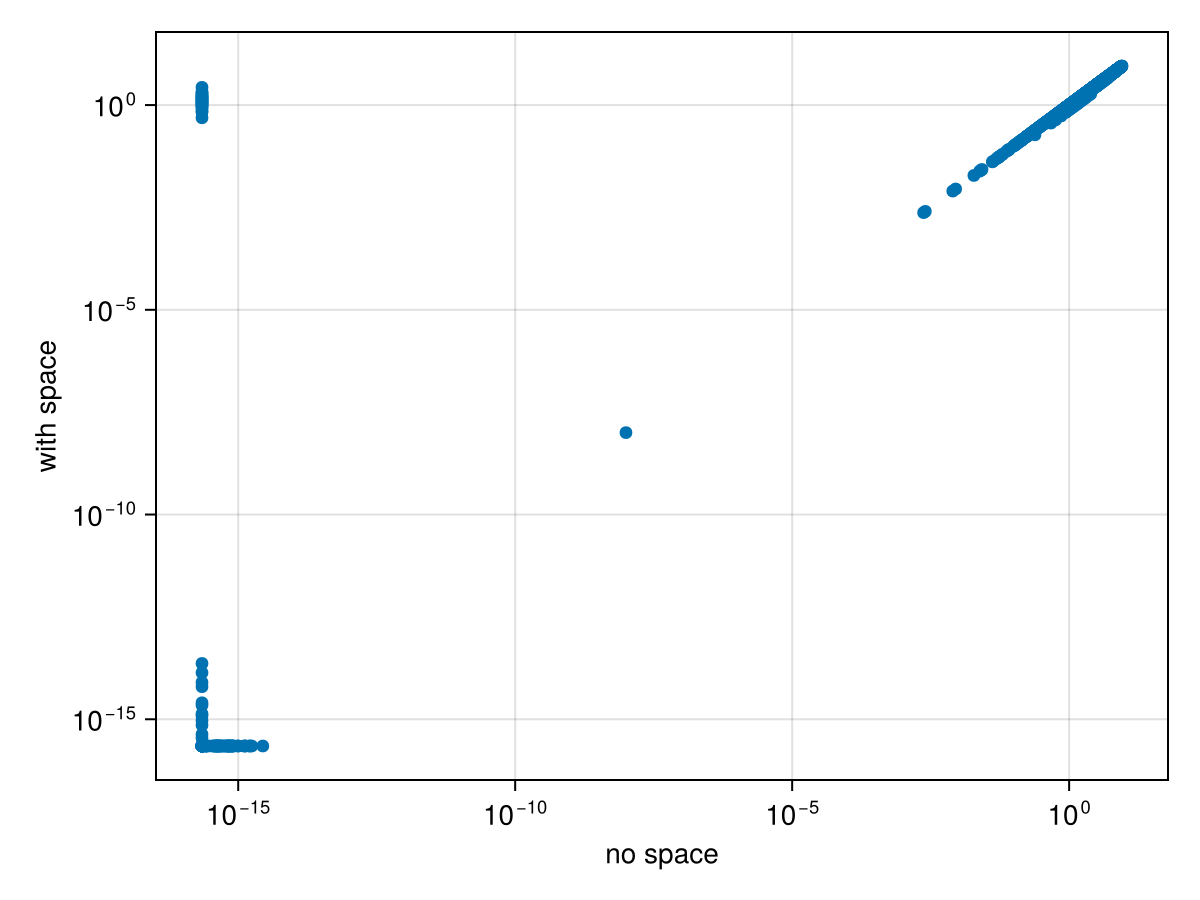

In [134]:
scatter(cNns[:], cNws[:];
    axis=(;
        xscale=log10,
        yscale=log10,
        xlabel="no space",
        ylabel="with space",
    )
)

#### Survivability only

In [135]:
thrh = 1e-10
surns = Nns .> thrh
surws = Nws .> thrh;

status = similar(surns, Int)
for i in eachindex(surns)
    status[i] = if !(surns[i]) && !(surws[i])
        1
    elseif !(surns[i]) && (surws[i])
        2
    elseif (surns[i]) && !(surws[i])
        3
    elseif (surns[i]) && (surws[i])
        4
    else
        throw(ErrorException("KAKAK"))
    end
end
countmap(status)

Dict{Int64, Int64} with 3 entries:
  4 => 1242
  2 => 26
  1 => 732

#### Looking at the difference

In [136]:
dN = Nws .- Nns;

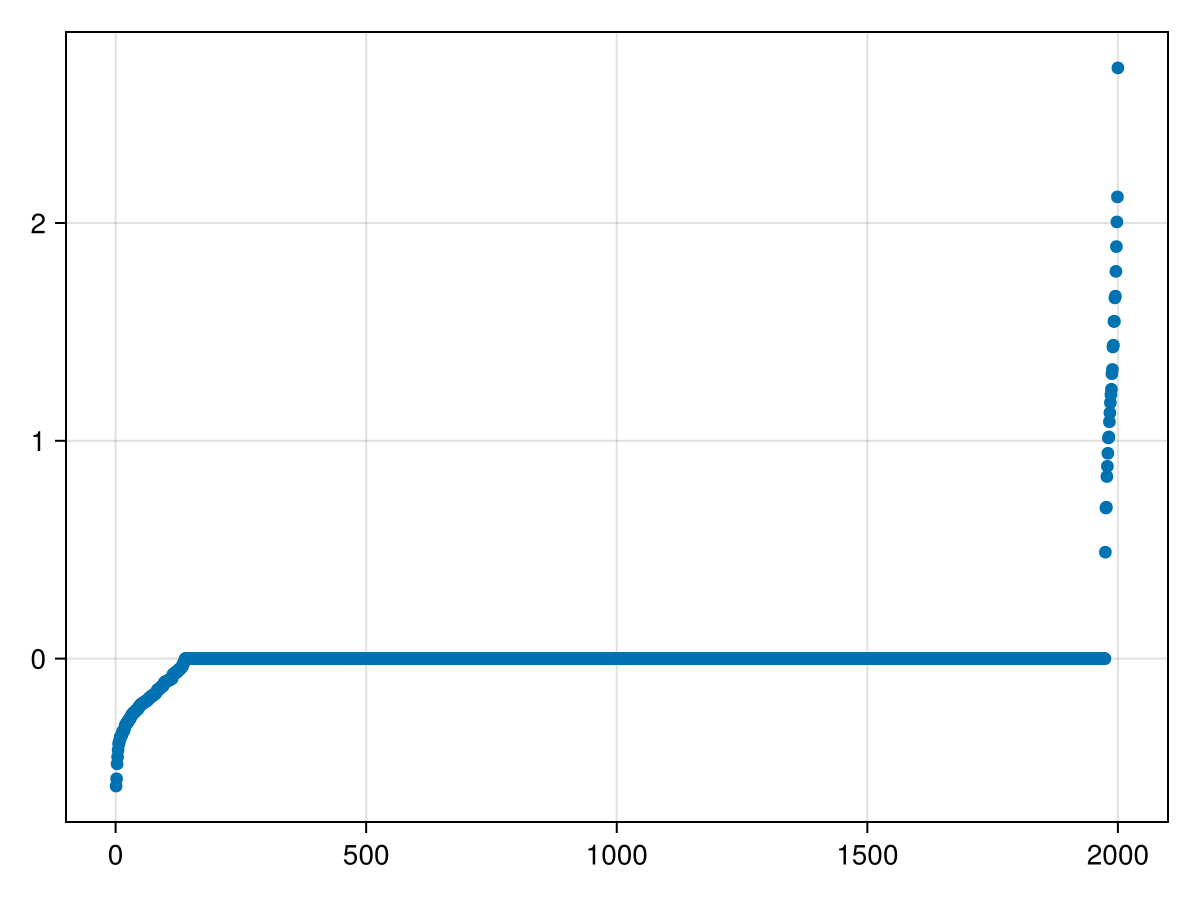

In [137]:
scatter(sort(dN[:]))

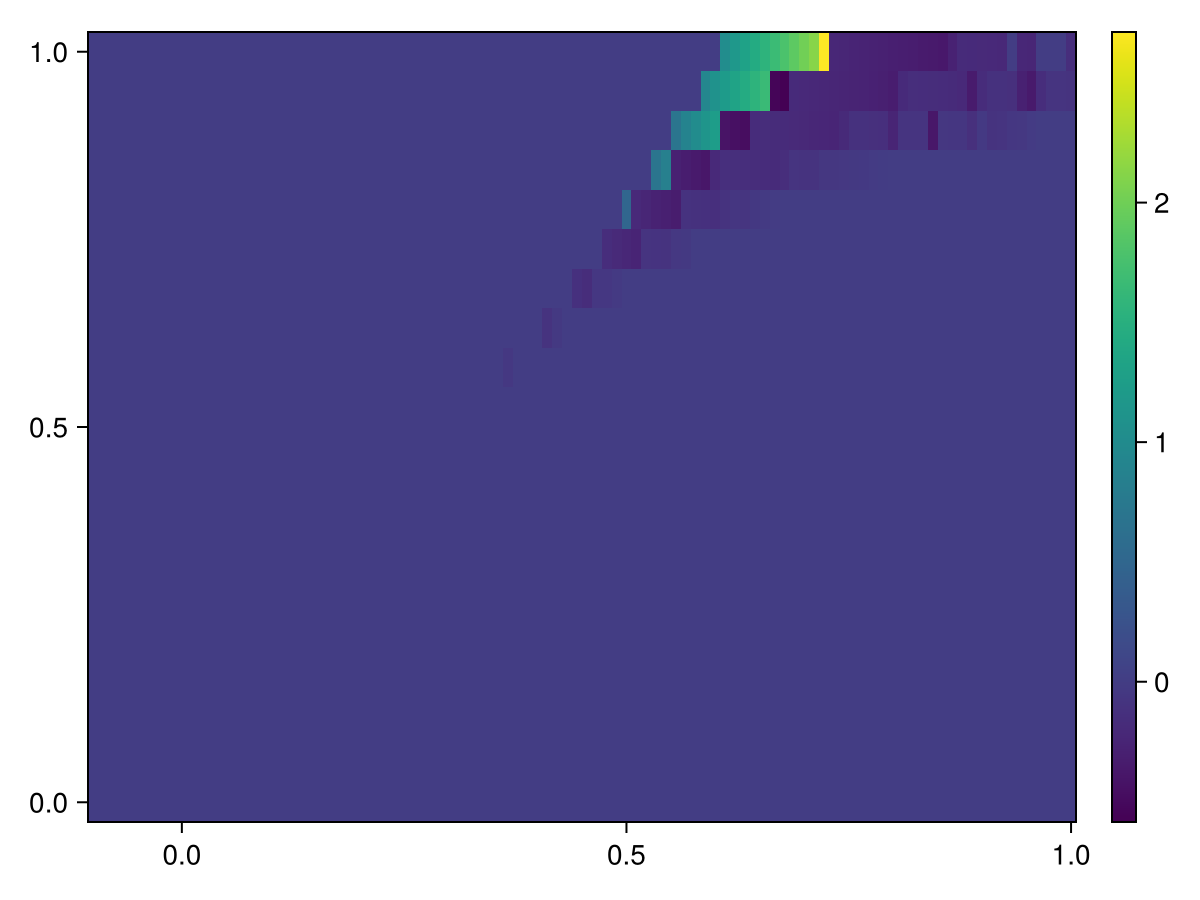

In [144]:
fap = heatmap(logKs, ls, dN;
# fap = heatmap(dN / (Nws .+ Nns);
    # colorscale=Makie.Symlog10(1000000*eps())
    # colorscale=Makie.pseudolog10
)
Colorbar(fap.figure[1,2], fap.plot)
fap